In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader as pdr
key = "1fc917d2a1180539dda34c743d109352792d8d88"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-30 00:00:00+00:00,113.05,113.37,111.80,112.46,36379106,26.500930,26.575944,26.207908,26.362624,145516424,0.0,1.0
1,AAPL,2016-10-03 00:00:00+00:00,112.52,113.05,112.28,112.71,21701760,26.376689,26.500930,26.320428,26.421228,86807040,0.0,1.0
2,AAPL,2016-10-04 00:00:00+00:00,113.00,114.31,112.63,113.06,29736835,26.489209,26.796297,26.402475,26.503274,118947340,0.0,1.0
3,AAPL,2016-10-05 00:00:00+00:00,113.05,113.66,112.69,113.40,21453089,26.500930,26.643925,26.416540,26.582976,85812356,0.0,1.0
4,AAPL,2016-10-06 00:00:00+00:00,113.89,114.34,113.13,113.70,28779313,26.697841,26.803329,26.519684,26.653302,115117252,0.0,1.0


In [8]:
df.shape

(1257, 14)

In [9]:
df1=df.reset_index()['close']

In [10]:
df1

0       113.05
1       112.52
2       113.00
3       113.05
4       113.89
         ...  
1252    145.85
1253    146.83
1254    146.92
1255    145.37
1256    141.91
Name: close, Length: 1257, dtype: float64

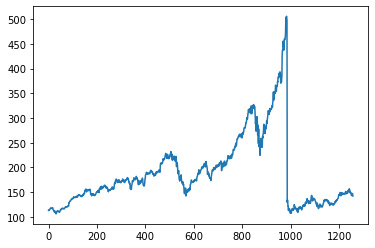

In [11]:
plt.plot(df1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 440)

In [16]:
train_data

array([[0.01833258],
       [0.01700884],
       [0.0182077 ],
       [0.01833258],
       [0.02043059],
       [0.02085519],
       [0.02582547],
       [0.02644987],
       [0.0290474 ],
       [0.02814826],
       [0.02977172],
       [0.02957191],
       [0.0293721 ],
       [0.02849793],
       [0.02834807],
       [0.02719916],
       [0.02982167],
       [0.03132025],
       [0.02467656],
       [0.02190419],
       [0.02000599],
       [0.01955642],
       [0.01443629],
       [0.01468605],
       [0.01029022],
       [0.00781757],
       [0.01173885],
       [0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.013

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 292ms/step - loss: 0.0229 - val_loss: 0.0304
Epoch 2/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0033 - val_loss: 0.0249
Epoch 3/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0016 - val_loss: 0.0210
Epoch 4/100
12/12 [==============================] - 1s 116ms/step - loss: 8.6843e-04 - val_loss: 0.0224
Epoch 5/100
12/12 [==============================] - 1s 111ms/step - loss: 5.2426e-04 - val_loss: 0.0263
Epoch 6/100
12/12 [==============================] - 1s 113ms/step - loss: 5.1764e-04 - val_loss: 0.0248
Epoch 7/100
12/12 [==============================] - 1s 116ms/step - loss: 4.4283e-04 - val_loss: 0.0244
Epoch 8/100
12/12 [==============================] - 1s 120ms/step - loss: 3.6655e-04 - val_loss: 0.0238
Epoch 9/100
12/12 [==============================] - 1s 117ms/step - loss: 4.2544e-04 - val_loss: 0.0253
Epoch 10/100
12/12 [==============================] - 1s 117ms/step

12/12 [==============================] - 1s 110ms/step - loss: 1.4585e-04 - val_loss: 0.0079
Epoch 79/100
12/12 [==============================] - 1s 107ms/step - loss: 1.2305e-04 - val_loss: 0.0077
Epoch 80/100
12/12 [==============================] - 2s 135ms/step - loss: 1.3956e-04 - val_loss: 0.0077
Epoch 81/100
12/12 [==============================] - 2s 158ms/step - loss: 1.2720e-04 - val_loss: 0.0071
Epoch 82/100
12/12 [==============================] - 2s 155ms/step - loss: 1.3470e-04 - val_loss: 0.0072
Epoch 83/100
12/12 [==============================] - 2s 124ms/step - loss: 1.3828e-04 - val_loss: 0.0072
Epoch 84/100
12/12 [==============================] - 1s 113ms/step - loss: 1.2526e-04 - val_loss: 0.0070
Epoch 85/100
12/12 [==============================] - 1s 110ms/step - loss: 1.2177e-04 - val_loss: 0.0077
Epoch 86/100
12/12 [==============================] - 1s 112ms/step - loss: 1.5618e-04 - val_loss: 0.0067
Epoch 87/100
12/12 [==============================] - 1s 11

In [27]:
import tensorflow as tf

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error

In [34]:
math.sqrt(mean_squared_error(y_train,train_predict))

188.48598943703962

In [37]:
math.sqrt(mean_squared_error(ytest, test_predict))

219.60922965860027

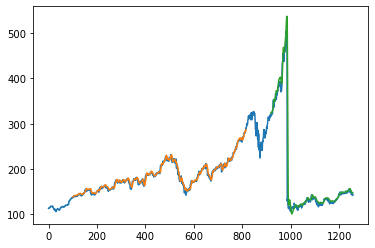

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

440

In [40]:
x_input = test_data[341:].reshape(1, -1)

In [41]:
temp_input=list(x_input)
temp_input = temp_input[0].tolist()

In [42]:
temp_input

[0.05279984015185574,
 0.050452070532993665,
 0.04260952095509268,
 0.04810430091413159,
 0.054298416504320934,
 0.05135121634447276,
 0.04780458564363854,
 0.04740496528298116,
 0.05394874868874572,
 0.04925320945102157,
 0.05342424696538289,
 0.05292472151456118,
 0.05279984015185574,
 0.048878565362905246,
 0.047205155102652496,
 0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

ValueError: cannot reshape array of size 99 into shape (1,100,1)